In [1]:
#!/usr/bin/env python
#coding=utf-8

In [2]:
# Connect with google drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

In [3]:
# import package
# 資料處理用
import pandas as pd
import numpy as np

# 數學統計函式
import statistics as stat

# 選擇隨機森林建模
from sklearn.ensemble import RandomForestClassifier # 隨機森林
from sklearn.model_selection import GridSearchCV, train_test_split # splite training data to train, test data for training 
from sklearn import metrics # 看精確度用
from sklearn.model_selection import cross_val_score # 交叉驗證用
from sklearn.metrics import confusion_matrix #混淆矩陣

# 繪圖函式庫
import matplotlib.pyplot as plt

# 繪圖函式庫
import seaborn as sns 

%matplotlib inline

In [4]:
pwd

'/Users/TAI/Google 雲端硬碟/Colab Notebooks/Game/OceanWast_data'

In [5]:
# load data
try:
    train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Game/OceanWast_data/train.csv')
    test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Game/OceanWast_data/test2.csv')
except:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test2.csv')

In [6]:
train.tail()

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
314,TT02,4,台東縣長濱鄉中成,長光,23.32287,121.46538,14,5,4,3,...,0,1,0,0,0,0,0,0,0,2
315,TT03,1,台東縣長濱鄉,白桑安,23.24933,121.41867,14,5,4,4,...,0,0,0,0,0,0,0,0,0,3
316,TT03,2,台東縣長濱鄉,白桑安/長濱觀景平台,23.24933,121.41867,14,5,4,4,...,0,0,0,0,0,0,0,0,0,2
317,TT03,3,台東縣長濱鄉,白桑安/長濱觀景平台,23.24933,121.41867,14,5,4,4,...,0,0,1,0,0,0,0,0,0,3
318,TT03,4,台東縣長濱鄉,寜埔,23.24933,121.41867,14,5,4,4,...,0,0,0,0,0,0,0,0,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 35 columns):
Station                               319 non-null object
Season                                319 non-null int64
County                                319 non-null object
Location                              319 non-null object
Lat                                   319 non-null float64
Lon                                   319 non-null float64
縣市                                    319 non-null int64
海岸段                                   319 non-null int64
Region                                319 non-null int64
Seat                                  319 non-null int64
Shore shape                           319 non-null int64
Substrate type                        319 non-null int64
1暴露岩岸                                 243 non-null float64
2暴露人造結構物                              243 non-null float64
3暴露岩盤                                 243 non-null float64
4沙灘                        

In [8]:
test.tail()

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Plastic bag,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others
158,TT01,4,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,0
159,TT04,1,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,1,0,1,0,0,0,0,0,1
160,TT04,2,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,0,0,0,1,0,0,0,0,0,1
161,TT04,3,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,0,1,0,1,0,0,0,0,0,0
162,TT04,4,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,0,1,0,1,0,0,0,0,0,1


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 34 columns):
Station                               163 non-null object
Season                                163 non-null int64
County                                163 non-null object
Location                              163 non-null object
Lat                                   163 non-null float64
Lon                                   163 non-null float64
縣市                                    163 non-null int64
海岸段                                   163 non-null int64
Region                                163 non-null int64
Seat                                  163 non-null int64
Shore shape                           163 non-null int64
Substrate type                        163 non-null int64
1暴露岩岸                                 124 non-null float64
2暴露人造結構物                              124 non-null float64
3暴露岩盤                                 124 non-null float64
4沙灘                        

### **補遺漏值**
取眾數填補Station (同座標)之遺漏值

In [10]:
# 將train, test 做outer join, 以利補遺漏值。
mix = pd.concat([train, test], axis=0, join='outer' , ignore_index=True, sort = True)

# 重整cloumn順序
mix = mix[['Station', 'Season', 'County', 'Location', 'Lat', 'Lon', '縣市', '海岸段', 'Region', 'Seat', 'Shore shape', 'Substrate type', \
           '1暴露岩岸', '2暴露人造結構物', '3暴露岩盤', '4沙灘', '5砂礫混合灘', '6礫石灘', '7開闊潮間帶', '8遮蔽岩岸', '9遮蔽潮間帶', '10遮蔽濕地', \
           'Plastic bottle container',	'Disposable cup / straw / tableware', 'Plastic bag', 'Foam material',	'Float', \
           'Fishing nets and ropes',	'Fishing equipment',	'Cigarette and lighter',	'Glass jar',	'Metal',	'Paper',	'Others', 'LEVEL']]
mix.head(8)

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
0,E02,1,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,1,0,0,0,0,0,2.0
1,E02,2,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,1,0,0,0,0,0,0,5.0
2,E02,3,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,0,0,1,0,0,0,2.0
3,E02,4,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,0,0,0,0,0,0,1.0
4,E03,1,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,0,0,0,0,0,0,0,5.0
5,E03,2,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,1,0,0,0,0,0,0,1,5.0
6,E03,3,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,1,0,0,0,0,0,0,7.0
7,E03,4,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,0,0,0,1,0,0,0,2.0


In [11]:
mix.tail(8)

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
474,TT01,1,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,1,0,0,0,0,0,0,0,0,NaN
475,TT01,2,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,NaN
476,TT01,3,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,1,0,0,0,0,0,0,NaN
477,TT01,4,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,NaN
478,TT04,1,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,1,NaN
479,TT04,2,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,0,0,1,0,0,0,0,0,1,NaN
480,TT04,3,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,0,NaN
481,TT04,4,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,1,NaN


In [12]:
# 取得station清單
Station_set = set()
for i in mix['Station']:
  Station_set.add(i)

# 地形清單
terrain_list = ['1暴露岩岸', '2暴露人造結構物', '3暴露岩盤', '4沙灘','5砂礫混合灘', '6礫石灘', '7開闊潮間帶', '8遮蔽岩岸', '9遮蔽潮間帶', '10遮蔽濕地'] 

In [13]:
for sat in Station_set:
  for terr in terrain_list:
    try:
      # 計算該Station之眾數
      mode_ = stat.mode(mix.loc[mix.Station == sat, terr])
      # 補該Station之遺漏值
      mix.loc[mix.Station == sat, terr]= mix.loc[mix.Station == sat, terr].fillna(value= mode_)
    except:
      # 若無眾數，則補999
      mix.loc[mix.Station == sat, terr]= mix.loc[mix.Station == sat, terr].fillna(value= 999)

In [14]:
# 找出地形為999的row
mix.loc[(mix['1暴露岩岸'] == 999) | (mix['2暴露人造結構物'] == 999) | (mix['3暴露岩盤'] == 999) | (mix['4沙灘'] == 999) | (mix['5砂礫混合灘'] == 999) \
        | (mix['6礫石灘'] == 999) | (mix['7開闊潮間帶'] == 999) | (mix['8遮蔽岩岸'] == 999) | (mix['9遮蔽潮間帶'] == 999)| (mix['10遮蔽濕地'] == 999)]

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
102,M17,4,台中市清水區,高美溼地,24.31156,120.52600,7,2,2,8,...,1,1,0,0,0,0,0,0,0,7.0
349,LI10,4,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,0,0,0,0,0,0,0,0,NaN


In [15]:
# 找出 Station == M17 來補遺漏值
mix.loc[mix.Station == 'M17']

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
100,M17,2,台中市清水,高美溼地,24.31156,120.526,7,2,2,8,...,0,0,0,0,0,0,0,0,1,3.0
101,M17,3,台中市清水,高美溼地,24.31156,120.526,7,2,2,8,...,0,1,0,0,0,0,0,0,0,5.0
102,M17,4,台中市清水區,高美溼地,24.31156,120.526,7,2,2,8,...,1,1,0,0,0,0,0,0,0,7.0


In [16]:
# 覺得高美濕地'暴露人造結構物'不會很多，因此補0
mix.loc[102, '2暴露人造結構物'] = 0
# 檢查一下
mix.loc[mix.Station == 'M17']

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
100,M17,2,台中市清水,高美溼地,24.31156,120.526,7,2,2,8,...,0,0,0,0,0,0,0,0,1,3.0
101,M17,3,台中市清水,高美溼地,24.31156,120.526,7,2,2,8,...,0,1,0,0,0,0,0,0,0,5.0
102,M17,4,台中市清水區,高美溼地,24.31156,120.526,7,2,2,8,...,1,1,0,0,0,0,0,0,0,7.0


In [17]:
# 找出 Station == LI10 來補遺漏值
mix.loc[mix.Station == 'LI10']

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
347,LI10,2,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,0,1,0,0,0,0,0,0,NaN
348,LI10,3,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,1,1,0,0,0,0,0,0,NaN
349,LI10,4,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,0,0,0,0,0,0,0,0,NaN


In [18]:
# '暴露人造結構物'補0, '5砂礫混合灘', '6礫石灘' 補1
mix.loc[349, '2暴露人造結構物'] = 0
mix.loc[349, '5砂礫混合灘'] = 1
mix.loc[349, '6礫石灘'] = 1
# 檢查一下
mix.loc[mix.Station == 'LI10']

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
347,LI10,2,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,0,1,0,0,0,0,0,0,NaN
348,LI10,3,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,1,1,0,0,0,0,0,0,NaN
349,LI10,4,宜蘭縣,漢本,24.34039,121.77126,16,5,1,3,...,0,0,0,0,0,0,0,0,0,NaN


In [19]:
# 存個檔
try:
    mix.to_csv('/content/drive/My Drive/Colab Notebooks/Game/OceanWast_data/mix_v1.csv')
except:
     mix.to_csv('mix_v1.csv')

In [20]:
mix.head(8)

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
0,E02,1,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,1,0,0,0,0,0,2.0
1,E02,2,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,1,0,0,0,0,0,0,5.0
2,E02,3,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,0,0,1,0,0,0,2.0
3,E02,4,宜蘭縣,大溪,24.92528,121.88569,16,5,1,4,...,0,0,0,0,0,0,0,0,0,1.0
4,E03,1,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,0,0,0,0,0,0,0,5.0
5,E03,2,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,1,0,0,0,0,0,0,1,5.0
6,E03,3,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,1,0,0,0,0,0,0,7.0
7,E03,4,宜蘭縣,頭城,24.85730,121.83342,16,5,1,4,...,0,0,0,0,0,1,0,0,0,2.0


In [21]:
mix.tail(8)

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
474,TT01,1,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,1,0,0,0,0,0,0,0,0,NaN
475,TT01,2,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,NaN
476,TT01,3,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,1,0,0,0,0,0,0,NaN
477,TT01,4,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,NaN
478,TT04,1,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,1,NaN
479,TT04,2,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,0,0,1,0,0,0,0,0,1,NaN
480,TT04,3,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,0,NaN
481,TT04,4,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,1,NaN


In [22]:
# 將train and test 分開
train = mix.iloc[:319]
test = mix.iloc[319:].reset_index(drop=True)

In [23]:
train.tail(8)

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
311,TT02,1,台東縣長濱鄉中成,長濱,23.32287,121.46538,14,5,4,3,...,0,0,0,0,0,0,0,0,0,2.0
312,TT02,2,台東縣長濱鄉中成,長濱,23.32287,121.46538,14,5,4,3,...,1,0,0,0,0,0,0,0,0,1.0
313,TT02,3,台東縣長濱鄉中成,長濱,23.32287,121.46538,14,5,4,3,...,1,0,1,0,0,0,1,0,0,5.0
314,TT02,4,台東縣長濱鄉中成,長光,23.32287,121.46538,14,5,4,3,...,0,1,0,0,0,0,0,0,0,2.0
315,TT03,1,台東縣長濱鄉,白桑安,23.24933,121.41867,14,5,4,4,...,0,0,0,0,0,0,0,0,0,3.0
316,TT03,2,台東縣長濱鄉,白桑安/長濱觀景平台,23.24933,121.41867,14,5,4,4,...,0,0,0,0,0,0,0,0,0,2.0
317,TT03,3,台東縣長濱鄉,白桑安/長濱觀景平台,23.24933,121.41867,14,5,4,4,...,0,0,1,0,0,0,0,0,0,3.0
318,TT03,4,台東縣長濱鄉,寜埔,23.24933,121.41867,14,5,4,4,...,0,0,0,0,0,0,0,0,0,1.0


In [24]:
test.tail(8)

,Station,Season,County,Location,Lat,Lon,縣市,海岸段,Region,Seat,...,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others,LEVEL
155,TT01,1,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,1,0,0,0,0,0,0,0,0,NaN
156,TT01,2,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,NaN
157,TT01,3,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,1,0,0,0,0,0,0,NaN
158,TT01,4,台東縣長濱鄉樟原村,八仙北,23.40975,121.48345,14,5,4,3,...,0,0,0,0,0,0,0,0,0,NaN
159,TT04,1,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,1,NaN
160,TT04,2,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,0,0,1,0,0,0,0,0,1,NaN
161,TT04,3,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,0,NaN
162,TT04,4,台東縣長濱鄉,石雨傘,23.17844,121.40177,14,5,4,2,...,1,0,1,0,0,0,0,0,1,NaN


#### **檢查各因子相關性**

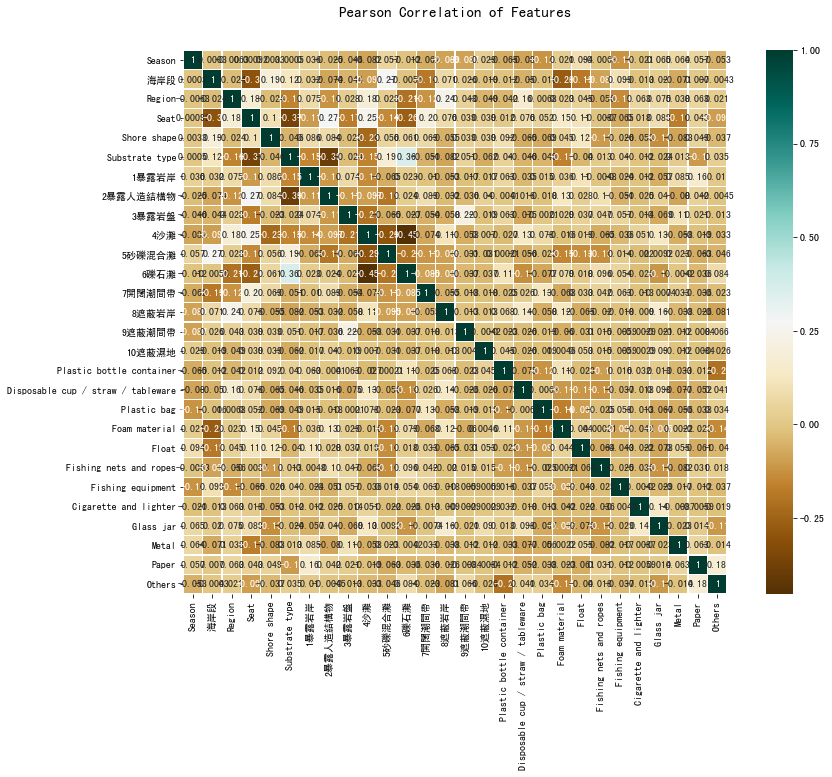

In [25]:
# 畫圖看一下個參數間相關性
mix_cor = mix[['Season', '海岸段', 'Region', 'Seat', 'Shore shape', 'Substrate type', \
           '1暴露岩岸', '2暴露人造結構物', '3暴露岩盤', '4沙灘', '5砂礫混合灘', '6礫石灘', '7開闊潮間帶', '8遮蔽岩岸', '9遮蔽潮間帶', '10遮蔽濕地', \
           'Plastic bottle container',	'Disposable cup / straw / tableware', 'Plastic bag', 'Foam material',	'Float', \
           'Fishing nets and ropes',	'Fishing equipment',	'Cigarette and lighter',	'Glass jar',	'Metal',	'Paper',	'Others']]

plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15) 
sns.heatmap(mix_cor.astype(float).corr(), cmap = "BrBG",
linewidths=0.1, square=True, linecolor='white', annot=True)


雖然未顯現中文，但可看出各變數相關性不高(<0.7)

#### **建模**

##### 1. 先隨意建立一個模型，找出哪些因子重要性較高

In [40]:
# 設定建模的x,y，排除不想要放入模型的變數，如Station, County, Location等(因為是人為定義的)
x_factor = ['Season', '海岸段', 'Region', 'Seat', 'Shore shape', 'Substrate type', \
           '1暴露岩岸', '2暴露人造結構物', '3暴露岩盤', '4沙灘', '5砂礫混合灘', '6礫石灘', 
           '7開闊潮間帶', '8遮蔽岩岸', '9遮蔽潮間帶', '10遮蔽濕地', \
           'Plastic bottle container', 'Disposable cup / straw / tableware', \
           'Plastic bag', 'Foam material', 'Float', \
           'Fishing nets and ropes', 'Fishing equipment', 'Cigarette and lighter', \
           'Glass jar', 'Metal', 'Paper', 'Others']

x = train[x_factor]          
y = train['LEVEL'] # 建模的y

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=56) #8, 2分，隨機種子為56，確保每次隨機可得到相同的結果

In [41]:
X_train.head(5) # 確認隨機抽的情況，發現為不規則抽。

,Season,海岸段,Region,Seat,Shore shape,Substrate type,1暴露岩岸,2暴露人造結構物,3暴露岩盤,4沙灘,...,Plastic bag,Foam material,Float,Fishing nets and ropes,Fishing equipment,Cigarette and lighter,Glass jar,Metal,Paper,Others
135,1,1,3,8,1,5,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
168,2,1,3,3,1,3,0.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
20,1,5,1,4,1,5,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
75,4,3,2,7,1,4,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,0
23,4,5,1,4,1,5,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# 隨意建模，參數幾乎皆為預設
clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators = 100, oob_score=True, random_state=56)
clf = clf.fit(X_train, y_train)
print(clf.oob_score_)

0.21176470588235294


**隨機森林參數：**

n_estimators: 樹數
- version 0.20: 預設10顆。
- version 0.22: 預設100顆 。

min_samples_split:
- 某節點的樣本數少於min_samples_split，則不會繼續再嘗試選擇最優特徵來進行劃分。

oob_score: bool (default=False)
- Whether to use out-of-bag samples to estimate the generalization accuracy. #利用out-of-bag samples (袋外樣本)評估泛化精確度。

- if True, 即採用袋外樣本來評估模型的好壞。
- 多單個模型的參數訓練中，通常用cross validation（cv）來進行交叉驗證，但是特別消耗時間，因此可使用這類的數據對決策樹模型進行驗證，算是一個簡單的交叉驗證。性能消耗小，但是效果不錯。

random_state: 類似隨機種子，可每次切分資料的結果都相同。

**資料料來源：**
1. https://www.itread01.com/content/1549571767.html (各參數說明)
2. https://www.cnblogs.com/pinard/p/6160412.html
3. https://zhuanlan.zhihu.com/p/31322257

In [43]:
# 找出各參數重要性
importance = []
for i in range(len(clf.feature_importances_)): # 將因子與重要性配對
  importance.append([x_factor[i], clf.feature_importances_[i]])

importance.sort(key=lambda x:x[1], reverse=True) # 將重要性依大至小排列

print('各參數重要性') # 將各因子印出
for i in importance:
  print(i)

各參數重要性
['Season', 0.12222083290063476]
['Seat', 0.10469511497072803]
['海岸段', 0.08079770747039897]
['Substrate type', 0.07113976436513439]
['Region', 0.06338819499359037]
['Plastic bottle container', 0.054004547115922064]
['Fishing nets and ropes', 0.052424496428344715]
['Shore shape', 0.04902658719701909]
['Foam material', 0.04493798433558721]
['4沙灘', 0.04021292816583321]
['Disposable cup / straw / tableware', 0.03661035188047012]
['2暴露人造結構物', 0.03289039203026792]
['Float', 0.03280663880468371]
['5砂礫混合灘', 0.030630788143878117]
['Others', 0.0305315879915392]
['6礫石灘', 0.02822913214023559]
['Glass jar', 0.023026936315295673]
['Plastic bag', 0.016580016643156167]
['3暴露岩盤', 0.016422540067761168]
['1暴露岩岸', 0.015250946576904265]
['7開闊潮間帶', 0.013890643041241001]
['Metal', 0.013512806082829303]
['8遮蔽岩岸', 0.011571216192108335]
['Fishing equipment', 0.005179552057007256]
['Paper', 0.004967403264853575]
['10遮蔽濕地', 0.002208385307913736]
['Cigarette and lighter', 0.0014956882864110468]
['9遮蔽潮間帶', 0.

得知Season重要性最高，Seat (海岸朝向)次等，再來為海岸段。

##### **2. 開始認真建模，找出噪聲因子**

用隨意建模中，最重要的兩個因子來建模，並以此為基準。再依重要性增加因子建模，若準確度或分數下降則表示該因子為噪聲，或是模型參數已經調過頭導致了overfitting，此時該做的就是回到最簡單的Base Model，一項一項特徵慢慢地加入。

參考來源：https://medium.com/@yulongtsai/https-medium-com-yulongtsai-titanic-top3-8e64741cc11f

In [56]:
# 設定建模的x,y，排除不想要放入模型的變數，如Station, County, Location等(因為是人為定義的)
x_factor = ['Season', 'Seat']
           
x = train[x_factor]          
y = train['LEVEL'] # 建模的y

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=56) #8, 2分，隨機種子為56，確保每次隨機可得到相同的結果

# 建模
clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators = 300, oob_score=True, random_state=56)
clf = clf.fit(X_train, y_train)
print('oob_score_:', clf.oob_score_)

oob_score_: 0.15294117647058825


以oob_score_: 0.15為基準，依序將因子依序加入，若oob_score_下降則將該因子排除。

In [121]:
# 設定建模的x,y，排除不想要放入模型的變數，如Station, County, Location等(因為是人為定義的)
x_factor = ['Season', 'Seat', '海岸段', 'Substrate type', 'Region', 'Plastic bottle container', 
            'Fishing nets and ropes', 'Shore shape', 'Disposable cup / straw / tableware',
           'Others', '8遮蔽岩岸']
        
x = train[x_factor]          
y = train['LEVEL'] # 建模的y

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=56) #8, 2分，隨機種子為56，確保每次隨機可得到相同的結果

# 建模
clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators = 300, oob_score=True, random_state=56)
clf = clf.fit(X_train, y_train)
print(clf.oob_score_)

0.30196078431372547


會使oob_score_下降的因子有：'Foam material' (0.27 -> 0.25), '4沙灘' (0.27 -> 0.26), '2暴露人造結構物' (0.28 -> 0.27)
, 'Float' (0.28 -> 0.23), '5砂礫混合灘' (0.28 -> 0.25), '6礫石灘', '6礫石灘' (0.29 -> 0.25), 'Glass jar' (0.29 -> 0.28), 'Plastic bag' (0.29 -> 0.27), '3暴露岩盤' (0.29 -> 0.27), '1暴露岩岸' (0.29 -> 0.27), '7開闊潮間帶' (0.29 -> 0.28), 'Metal' (0.29 -> 0.28), 'Fishing equipment' (0.30 -> 0.26), 'Paper' (0.30 -> 0.26), '10遮蔽濕地' (0.30 -> 0.25), 'Cigarette and lighter' (0.30 -> 0.27), '9遮蔽潮間帶' (0.30 -> 0.29)

#### 由上述得知，除了'8遮蔽岩岸'外，環境因子皆未發揮作用，顯然補遺漏值的方法有問題，也許同經緯度的地方，用眾數補遺漏值不是個好方法，須從補遺漏值開始。

## 姑且還是來跑一下

In [130]:
# 利用GridSearchCV找出最適合的參數
clf = RandomForestClassifier()
p = {
    'n_estimators': range(100,500, 10),
    'max_depth': range(5, 100)
}

grid = GridSearchCV(clf, p, cv = 7)
grid.fit(X_train, y_train)
grid.best_params_
max_depth= dict(grid .best_params_)['max_depth']
n_estimators = dict(grid.best_params_)['n_estimators']
print("'max_depth':{0}, \n'n_estimators':{1}".format(max_depth, n_estimators))

/Users/TAI/.local/share/virtualenvs/OceanWast_data-j7twvMXl/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


'max_depth':15, 
'n_estimators':340


In [148]:
# 建模
# 雖然max_depth = 17, n_estimators = 300之oob_score_分數較好，但是僅差一點點，還是先以GridSearchCV為主。
clf = RandomForestClassifier()
clf = RandomForestClassifier(max_depth = 15, n_estimators = 340, oob_score=True, random_state=56)
clf = clf.fit(X_train, y_train)
print('oob_score_:', clf.oob_score_)

oob_score_: 0.2901960784313726


In [156]:
# 用X_test 預測 y_pred，之後再跟y_test比對精確度(正確率)
y_pred=clf.predict(X_test)
y_pred

array([5., 9., 6., 2., 2., 7., 7., 2., 6., 7., 3., 5., 2., 2., 6., 7., 8.,
       5., 5., 2., 4., 2., 2., 2., 2., 9., 6., 4., 6., 6., 4., 9., 6., 8.,
       7., 2., 4., 7., 2., 6., 8., 8., 6., 8., 9., 6., 3., 5., 6., 8., 6.,
       8., 1., 2., 8., 5., 4., 6., 7., 6., 7., 5., 7., 5.])

In [157]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.234375


In [170]:
score = cross_val_score(clf, X_test, y_test, cv = 5) #cv = 5, 分5組
print('十次分數：', score)
print('平均分數：',score.mean())

/Users/TAI/.local/share/virtualenvs/OceanWast_data-j7twvMXl/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


十次分數： [0.44444444 0.13333333 0.41666667 0.1        0.11111111]
平均分數： 0.24111111111111114


In [155]:
# 混淆矩陣，看哪些分錯
# '列' or 左邊為正確標籤，'行' or '上面'為預測
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,5,1,0,0,1,1,0,0,0
2,0,2,0,1,0,0,0,1,0,0
3,0,2,0,0,1,1,1,2,0,0
4,0,2,0,0,2,6,3,0,0,0
5,0,2,0,2,2,3,1,1,0,0
6,0,0,1,1,3,1,3,2,0,0
7,0,0,0,1,0,1,0,1,2,0
8,0,0,0,0,0,1,0,1,0,0
9,0,0,0,0,0,0,0,0,2,0


In [171]:
y_pred = clf.predict(test[x_factor])
y_pred

array([ 2.,  2.,  2.,  2.,  5.,  6.,  6.,  4.,  7.,  5.,  2.,  3.,  3.,
        5.,  4.,  2.,  2.,  2.,  2.,  3.,  5.,  3.,  4.,  2.,  2.,  3.,
        5.,  2.,  6.,  2.,  2.,  8.,  8.,  8.,  7.,  6.,  6.,  6.,  6.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  6.,  6.,  6.,  5.,  6.,
        6.,  6.,  7.,  6.,  6.,  4.,  6.,  4.,  6.,  2.,  2.,  5.,  3.,
        5.,  1.,  3.,  7.,  7.,  6.,  8.,  9., 10., 10.,  8.,  5.,  6.,
        1.,  8.,  9., 10.,  8.,  8.,  9.,  8., 10.,  6.,  4.,  4.,  3.,
        8.,  8.,  8.,  8.,  5.,  1.,  4.,  5.,  5.,  1.,  2.,  2.,  2.,
        1.,  4.,  2.,  2.,  1.,  2.,  2.,  8.,  7.,  8.,  8.,  2.,  5.,
        3.,  3.,  6.,  7.,  5.,  6.,  6.,  5.,  7.,  6.,  7.,  3.,  7.,
        1.,  7.,  8.,  2.,  6.,  6.,  6.,  2.,  2.,  7.,  3.,  7.,  1.,
        7.,  7.,  9.,  6.,  6.,  7.,  9.,  6.,  6.,  8.,  8.,  6.,  2.,
        1.,  4.,  2.,  5.,  5.,  8.,  8.])

In [183]:
submission = pd.read_csv('submission.csv')
submission['LEVEL'] = y_pred

# 存檔
file = 'submission_v1.csv'
try:
    submission.to_csv('/content/drive/My Drive/Colab Notebooks/Game/OceanWast_data/' + file)
except:
    submission.to_csv(file)
    
submission

,ID,LEVEL
0,E01_1,2.0
1,E01_2,2.0
2,E01_3,2.0
3,E01_4,2.0
4,E04_1,5.0
...,...,...
158,TT01_4,2.0
159,TT04_1,5.0
160,TT04_2,5.0
161,TT04_3,8.0


## **提交**
得0.49分，第8名。
<img src="Aidea_海洋廢棄物_v1_排名.png" width="80%">

之後針對遺漏值填補進行修改。